In this Lab today, we will run the kNN model to determine the best ‘k’ value in order to determine whether a wine is of high quality. 

We will use the following features: ‘density’, ‘sulphates’, residual sugar’.

Please check 'k' values from 1 to 50 in order to determine the best 'k' value.

Below is start code which obtains demo data from Amazon Web Services website:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'color', u'is_red', u'high_quality'],
      dtype='object')

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [4]:
test_idx = np.random.uniform(0, 1, len(df)) <= 0.3
train = df[test_idx==True]
test = df[test_idx==False]

In [5]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,1.0,0.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,1.0,1.0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,1.0,0.0
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,5,red,1.0,0.0


In [14]:
features = ['density', 'sulphates', 'residual_sugar']

results = []
for n in range(1, 51, 1):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[features], train['high_quality'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['high_quality'], 1, 0).sum() / float(len(test))
    print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))
    results.append([n, accuracy])
results = pd.DataFrame(results, columns=["n", "accuracy"])

Neighbors: 1, Accuracy: 0.762155
Neighbors: 2, Accuracy: 0.799825
Neighbors: 3, Accuracy: 0.770039
Neighbors: 4, Accuracy: 0.798511
Neighbors: 5, Accuracy: 0.787779
Neighbors: 6, Accuracy: 0.801139
Neighbors: 7, Accuracy: 0.790188
Neighbors: 8, Accuracy: 0.799168
Neighbors: 9, Accuracy: 0.793473
Neighbors: 10, Accuracy: 0.800044
Neighbors: 11, Accuracy: 0.796321
Neighbors: 12, Accuracy: 0.800482
Neighbors: 13, Accuracy: 0.798292
Neighbors: 14, Accuracy: 0.800920
Neighbors: 15, Accuracy: 0.800044
Neighbors: 16, Accuracy: 0.803110
Neighbors: 17, Accuracy: 0.802015
Neighbors: 18, Accuracy: 0.801796
Neighbors: 19, Accuracy: 0.801577
Neighbors: 20, Accuracy: 0.804205
Neighbors: 21, Accuracy: 0.803767
Neighbors: 22, Accuracy: 0.803767
Neighbors: 23, Accuracy: 0.804205
Neighbors: 24, Accuracy: 0.803767
Neighbors: 25, Accuracy: 0.803767
Neighbors: 26, Accuracy: 0.803767
Neighbors: 27, Accuracy: 0.803548
Neighbors: 28, Accuracy: 0.803767
Neighbors: 29, Accuracy: 0.803767
Neighbors: 30, Accuracy

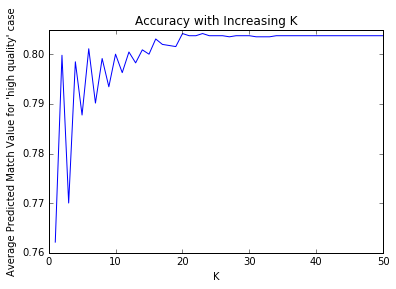

In [16]:
pl.plot(results["n"], results["accuracy"])
pl.title("Accuracy with Increasing K")
pl.xlabel("K")
pl.ylabel("Average Predicted Match Value for 'high quality' case")
pl.show()
#Optimal K value based on diminishing returns is ~23.

In [8]:
#Logistic Regression
df2 = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

#Split Dataset Into Data Features and Target
data   = df2[list(df2.columns[:-3])]
target = df2["high_quality"]

In [9]:
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [10]:
#df2['color'] = df2['color'].astype('category')
#df2['color'] = df2['color'].cat.codes
#df2.head()

In [11]:
#Build a logit model and fit
model = LogisticRegression()
model = model.fit(data, target)
print round(model.score(data, target),4)
# coefficients:
print model.coef_
print model.intercept_

0.9991
[[ -9.65652466e-01  -3.59425678e-02  -2.15384626e-01  -1.35623931e-01
   -9.61693545e-01  -3.80461952e-03  -1.84038654e-02  -6.47619806e+00
   -9.23244041e+00   1.77065182e-01  -7.55258866e-01   9.27615983e+00]]
[-6.55237472]


In [12]:
# predict class:
x_new = np.random.randn(6497,12)
y_pred = model.predict(x_new)
print y_pred

[ 0.  0.  0. ...,  1.  0.  0.]


In [13]:
# predicted probability:
y_pp = model.predict_proba(x_new)
print y_pp

[[  1.00000000e+00   1.94889722e-10]
 [  1.00000000e+00   1.86377252e-10]
 [  9.99994976e-01   5.02359346e-06]
 ..., 
 [  5.07520159e-09   9.99999995e-01]
 [  9.99994563e-01   5.43684476e-06]
 [  9.98191371e-01   1.80862935e-03]]
